Stage 1. 데이터 불러오기 (구글 드라이브에서 불러올려고 했으나 오류가 떠서 파일 자체를 여기에 업로드하는 방식으로 불러옴)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving train.csv to train.csv
Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['sample_submission.csv'].decode('utf-8')))

In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

Stage 2. 데이터 간단하게 살펴보기
#train, test 의 하위 행 5개를 확인합니

In [ ]:
submission = pd.read_csv('/content/sample_submission.csv')
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [ ]:
submission.info()
submission.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   10000 non-null  int64
 1   0       10000 non-null  int64
 2   1       10000 non-null  int64
 3   2       10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


In [ ]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [ ]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


#train 데이터의 컬럼들을 확인합니다. 변수도 확

In [ ]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [ ]:
# 소득 분류 값
set(train['income_type'])

{'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working'}

In [ ]:
#최종 학력

set(train['edu_type'])

{'Academic degree',
 'Higher education',
 'Incomplete higher',
 'Lower secondary',
 'Secondary / secondary special'}

In [ ]:
#가족 유형
set(train['family_type'])

{'Civil marriage', 'Married', 'Separated', 'Single / not married', 'Widow'}

In [ ]:
#집 유형

set(train['house_type'])

{'Co-op apartment',
 'House / apartment',
 'Municipal apartment',
 'Office apartment',
 'Rented apartment',
 'With parents'}

In [ ]:
#직업 유형

set(train['occyp_type'])

{'Accountants',
 'Cleaning staff',
 'Cooking staff',
 'Core staff',
 'Drivers',
 'HR staff',
 'High skill tech staff',
 'IT staff',
 'Laborers',
 'Low-skill Laborers',
 'Managers',
 'Medicine staff',
 'Private service staff',
 'Realty agents',
 'Sales staff',
 'Secretaries',
 'Security staff',
 'Waiters/barmen staff',
 nan}

#train 데이터의 기초 통계량을 간단하게 확인합니

In [ ]:
train.describe()
#DAYS_BIRTH: 출생일 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
#DAYS_EMPLOYED: 업무 시작일 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미. 양수 값은 고용되지 않은 상태를 의미함
#begin_month: 신용카드 발급 월 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
#Days_Birth, Days_employed, begin_month 변수들의 값이 음수로 나온거 확인. 알아보기 쉽게 바꿔야 한다는 것을 파악함

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
train.loc[train["DAYS_EMPLOYED"]> 0, "DAYS_EMPLOYED"] = 0
train["DAYS_BIRTH"] = (train["DAYS_BIRTH"] * -1) / 365.0
train["DAYS_EMPLOYED"] = (train["DAYS_EMPLOYED"] * -1) / 365.0
train["begin_month"] = (train["begin_month"] * -1)
#각 변수들을 날짜 단위가 아닌 연 단위로 바꿨음

In [ ]:
test.loc[test["DAYS_EMPLOYED"] > 0,"DAYS_EMPLOYED"] = 0
test["DAYS_BIRTH"] = (test["DAYS_BIRTH"] * -1) / 365.0
test["DAYS_EMPLOYED"] = (test["DAYS_EMPLOYED"] * -1) / 365.0
test["begin_month"] = (test["begin_month"] * -1)
#테스트 데이터도 똑같이 적용함

In [ ]:
# train 데이터의 카테고리 컬럼들을 추출합니다.
categories = train.select_dtypes(exclude='number')

# 추출한 변수들의 값들의 비율을 확인합니다.
for feature in categories:
  print(train[feature].value_counts(normalize=True))
  print('-'*50)
# value_counts(normalize=True)로 파라미터를 설정하면 각 값들의 비율을 확인할 수 있다!

gender
F    0.668897
M    0.331103
Name: proportion, dtype: float64
--------------------------------------------------
car
N    0.620252
Y    0.379748
Name: proportion, dtype: float64
--------------------------------------------------
reality
Y    0.673924
N    0.326076
Name: proportion, dtype: float64
--------------------------------------------------
income_type
Working                 0.515743
Commercial associate    0.234418
Pensioner               0.168160
State servant           0.081415
Student                 0.000265
Name: proportion, dtype: float64
--------------------------------------------------
edu_type
Secondary / secondary special    0.680160
Higher education                 0.270703
Incomplete higher                0.038553
Lower secondary                  0.009714
Academic degree                  0.000869
Name: proportion, dtype: float64
--------------------------------------------------
family_type
Married                 0.687757
Single / not married    0.132139
Civ

Step 2. 결측치 처리하기

In [ ]:
#결측치 처리하기. 결측치를 no job으로
train['occyp_type'] = train['occyp_type'].fillna('No job')

In [ ]:
test["occyp_type"] = test["occyp_type"].fillna("No job")
#테스트 데이터도 똑같이 결측치 처리

In [ ]:
# occyp_type 변수의 값의 비율을 백분율로 확인
round(train["occyp_type"].value_counts(normalize=True) * 100, 2)

,proportion
occyp_type,
No job,30.88
Laborers,17.05
Core staff,10.00
Sales staff,9.60
Managers,8.19
Drivers,5.95
High skill tech staff,3.93
Accountants,3.41
Medicine staff,3.27


Step 3. 전처리 데이터 저장하기

In [ ]:
# 전처리된 train, test 데이터를 각각 저장해줍니다.

# train.to_csv("train.csv", index=False)
# test.to_csv("test.csv", index=False)

Step 4. 모델링 기초
#regression과 classification 중 target이 0,1,2 3가지로 나뉘어지기 떄문에 분류 (classification)이 나을 것 같다는 결론을 내

In [ ]:
# credit 변수
train["credit"].value_counts()

,count
credit,
2.0,16968
1.0,6267
0.0,3222


#레이블 인코딩

In [ ]:
# sklearn 패키지의 tree 모듈에서 DecisionTreeClassifier 객체를 불러옵니다
from sklearn.tree import DecisionTreeClassifier

# model이라는 변수에 DecisionTreeClassifier 객체를 할당합니다
model = DecisionTreeClassifier(random_state=42)

In [ ]:
# sklearn 패키지의 preprocessing 모듈에서 LabelEncoder 함수를 불러옵니다
from sklearn.preprocessing import LabelEncoder

# le라는 변수에 LabelEncoder 함수를 할당합니다
le = LabelEncoder()

In [ ]:
# LabelEncoder로 object 타입 변수들을 수치형 데이터로 변환해줍니다
cols = train.select_dtypes(include=['object']).columns

for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [ ]:
train.head()
#변환 결과 확인

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,-0.104327,-0.0,1,0,0,0,12,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,-0.085419,-0.0,1,0,0,1,8,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,-0.143269,-0.0,1,0,1,0,10,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,-0.113252,-0.0,1,0,1,0,15,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,-0.112869,-0.0,1,0,0,0,10,2.0,-26.0,2.0


#데이터 나누

In [ ]:
X = train.drop(columns="credit")
y = train["credit"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#모델 학습 및 평

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {round(acc, 4)}")

Accuracy: 0.5913


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred, labels=[0, 1, 2])
print(cm)

[[ 167  153  330]
 [ 156  556  550]
 [ 378  596 2406]]


#예측하기 및 파일 제출

In [ ]:
pred = model.predict_proba(test)

submission.iloc[:,1:] = pred
submission

,index,0,1,2
0,26457,1,0,0
1,26458,1,0,0
2,26459,1,0,0
3,26460,1,0,0
4,26461,1,0,0
...,...,...,...,...
9995,36452,1,0,0
9996,36453,1,0,0
9997,36454,1,0,0
9998,36455,1,0,0


In [ ]:
submission.to_csv("submission1.csv", index=False)

#Step 5. EDA
# EDA (Exploratory Data Analysis) = 데이터 살펴보기
# 데이터 시각화를 통해서 데이터들 사이의 패턴을 파악하는 작업이다


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')
train.head()
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# matplotlib, seaborn 사용자 원하는대로 그래프 스타일 바꿀 수 있음
rc = {
    'axes.facecolor': 'F6F6F6',
    'figure.facecolor': '#B8B8B8',
    'axes.edgecolor': '#000000',
    'grid.color': 'C4C4C4',
    'axes.labelcolor': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'grid.alpha': 0.4
}


<Axes: xlabel='credit', ylabel='count'>

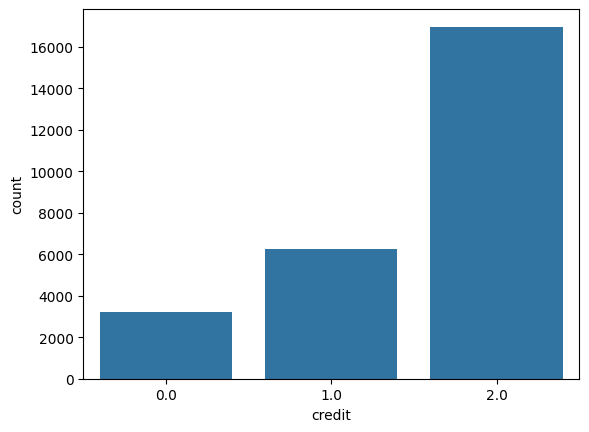

In [ ]:
sns.countplot(train,x='credit')

In [ ]:
#수치형 데이터 EDA
#변수 데이터 타입을 object로 바꿈
train['FLAG_MOBIL'] = train['FLAG_MOBIL'].astype('object')
train['work_phone'] = train['work_phone'].astype('object')
train['phone'] = train['phone'].astype('object')
train['email'] = train['email'].astype('object')

In [ ]:
train_num = train.select_dtypes(include='number')
train_num['credit']= train['credit']
train_cat = train.select_dtypes(exclude='number')
train_cat['credit']=train['credit']

<ipython-input-57-5adca717d505>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_num,y=col,x='credit',order=[0,1,2],


UnboundLocalError: local variable 'boxprops' referenced before assignment

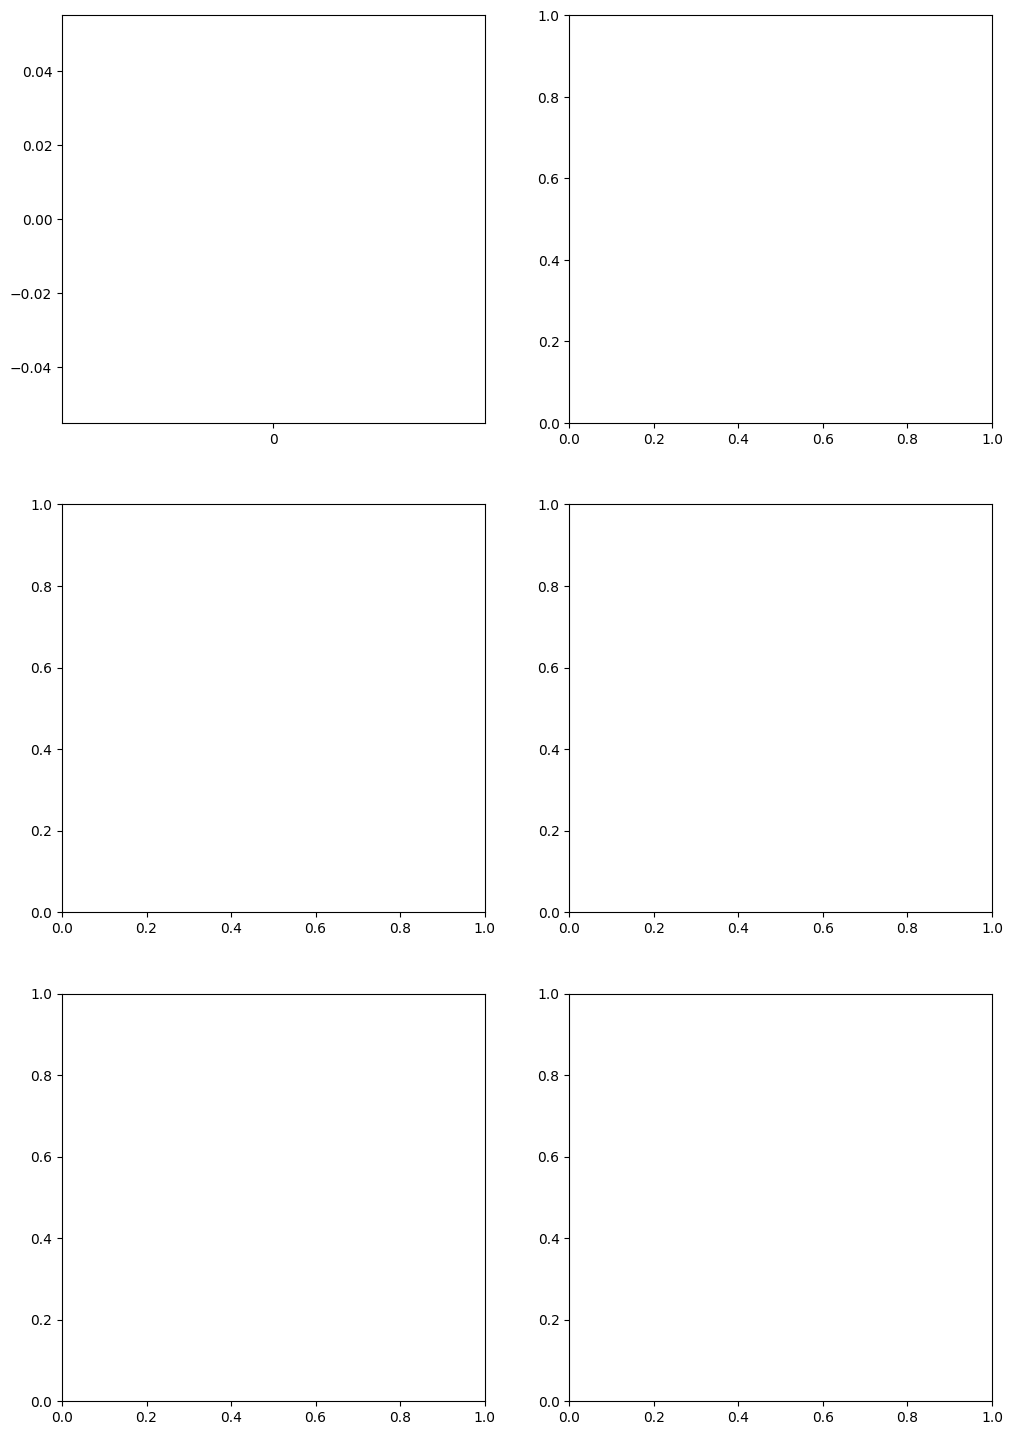

In [ ]:
#boxplot 그려서 수치형 데이터들을 시각화해주기
fig,axes=plt.subplots(nrows=3, ncols=2, figsize=(12,18))
axes=axes.flatten()

color = ['#FA5858','#2EFE2E','#0040FF']

num_eda_cols = train_num.columns[:-1]

for i,col in enumerate(num_eda_cols):
 sns.boxplot(data=train_num,y=col,x='credit',order=[0,1,2],
               ax=axes[i], palette=color)
 axes[i].set_title(f"Credit Distribution({col})",pad=10)
 axes[i].set_xlabel('')
 axes[i].set_ylabel('')


plt.suptitle('/n<Credit Distribution for Numeric Columns', fontsize=30)
plt.show()
#??ㅠㅠ 설명 그대로 적었는데 왜 안 뜨는지 모르겠어요

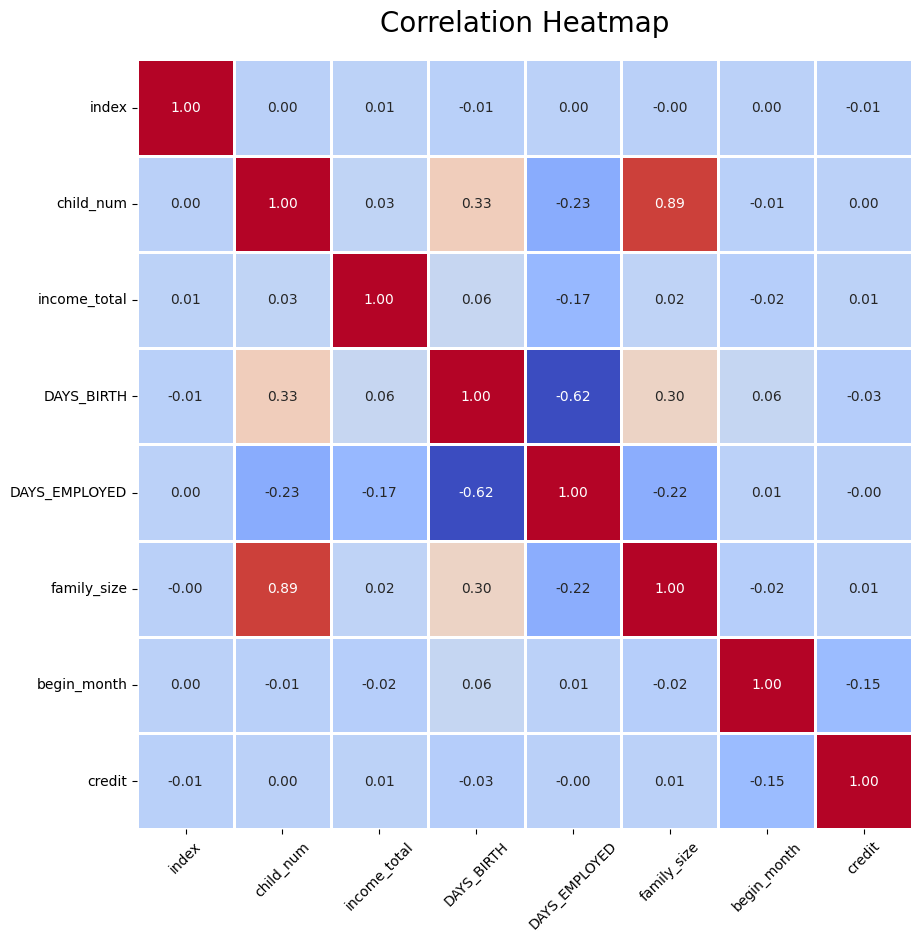

In [ ]:
#heatmap 변수들의 상관관계 보기
#corr ()는 수치형 데이터들의 상관관계를 반환해줌
plt.figure(figsize=(10,10))
sns.heatmap(train_num.corr(),cmap='coolwarm', annot=True, fmt='.2f', linewidths=1, cbar=False)
plt.xticks(rotation=45)
plt.title('Correlation Heatmap',pad=20, fontsize=20)
plt.show()

위의 correlation을 봤을 떄 child_num과 family_size는 양의 상관관계를 보여주고 있고

Days_birth와 child_num, family_size는 음의 상관관계 보여줌

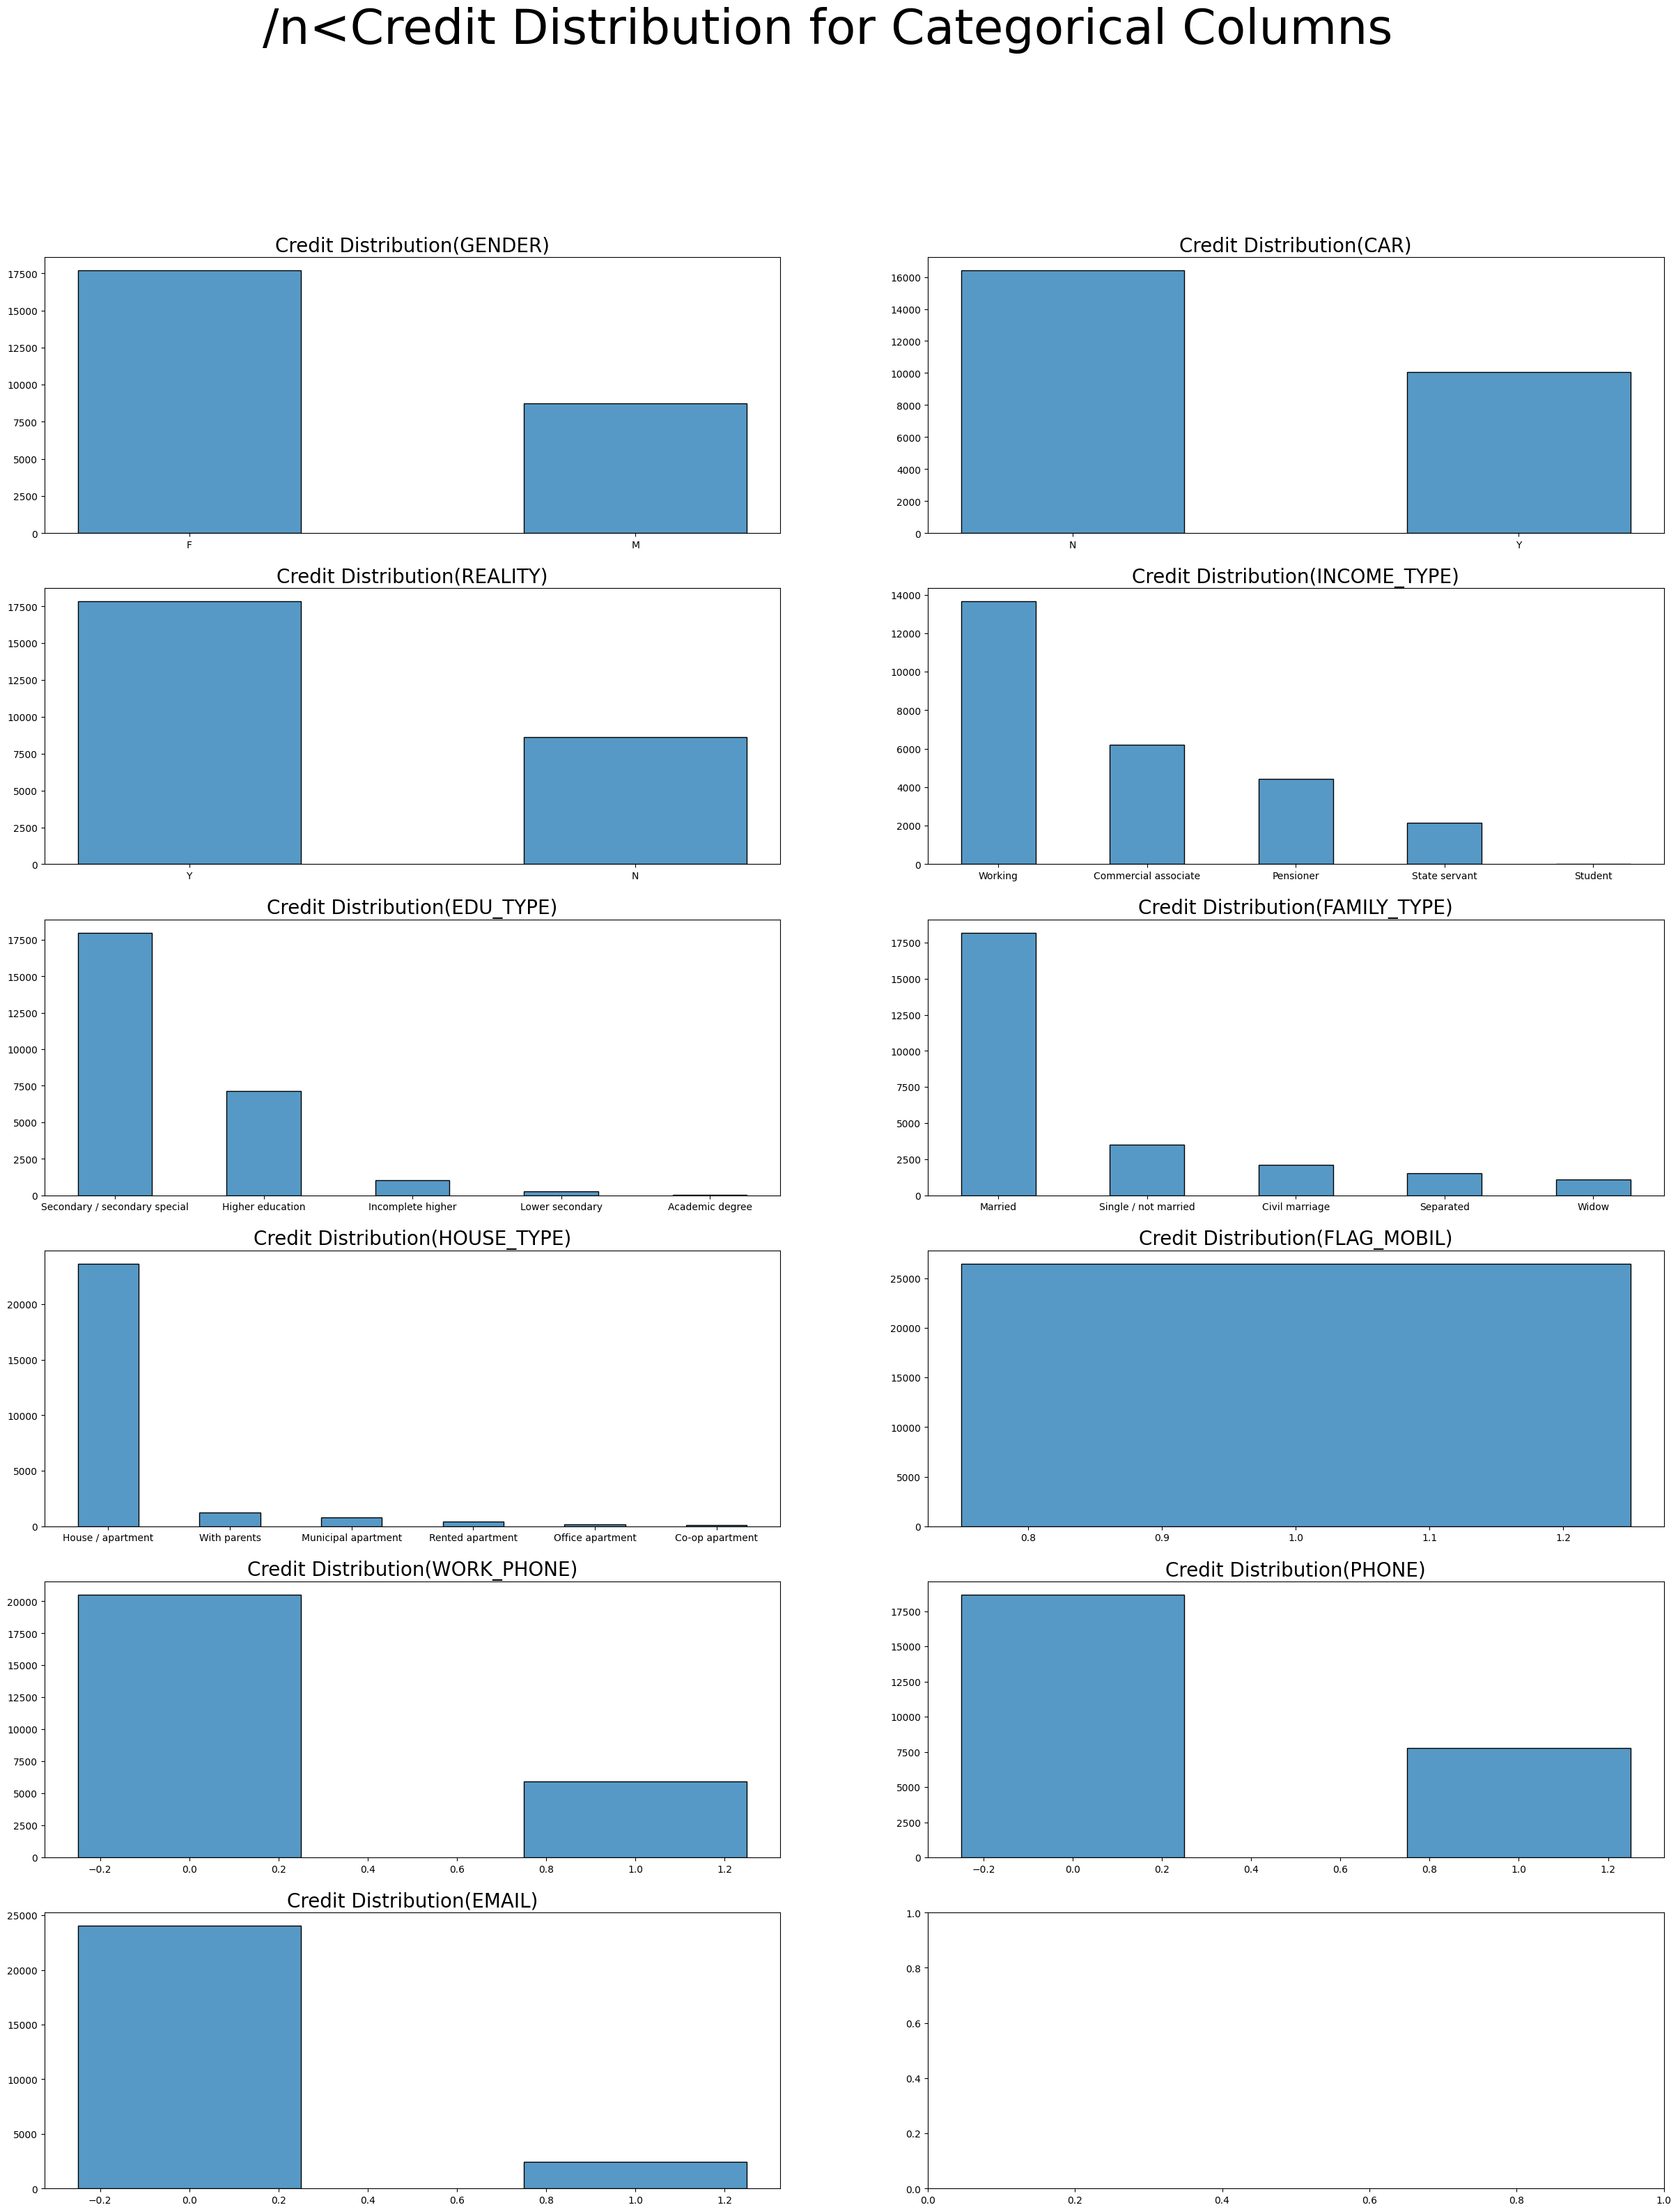

In [ ]:
#histplot도 만들어보기
cat_EDA_cols = train_cat.columns[:-2]
fig,axes=plt.subplots(nrows=6, ncols=2, figsize=(30,36))
axes = axes.flatten()

for i, col in enumerate(cat_EDA_cols):
  ax = axes[i]
  sorted_col = train_cat[col].value_counts().sort_values(ascending=False).index
  train_cat[col]=pd.Categorical(train_cat[col], sorted_col)

  sns.histplot(data=train_cat, x=col, binwidth=0.5, shrink=0.5,
               ax=ax, multiple='dodge')
  ax.set_title(f'Credit Distribution({col.upper()})', fontsize=20)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.suptitle('/n<Credit Distribution for Categorical Columns', fontsize=50)
plt.show()

In [ ]:
print(train_cat)
sorted_col = train_cat['occyp_type'].value_counts().sort_values(ascending=False).index
train_cat['occyp_type']=pd.Categorical(train_cat['occyp_type'], categories=sorted_col)

      gender car reality           income_type                       edu_type  \
0          F   N       N  Commercial associate               Higher education   
1          F   N       Y  Commercial associate  Secondary / secondary special   
2          M   Y       Y               Working               Higher education   
3          F   N       Y  Commercial associate  Secondary / secondary special   
4          F   Y       Y         State servant               Higher education   
...      ...  ..     ...                   ...                            ...   
26452      F   N       N         State servant  Secondary / secondary special   
26453      F   N       Y               Working               Higher education   
26454      F   Y       N               Working  Secondary / secondary special   
26455      M   N       Y               Working              Incomplete higher   
26456      F   N       N               Working  Secondary / secondary special   

                family_type